> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. In order to work with the data in this workspace, you also need to upload it to the workspace. To do so, click on the jupyter icon in the upper left to be taken back to the workspace directory. There should be an 'Upload' button in the upper right that will let you add your data file(s) to the workspace. You can then click on the .ipynb file name to come back here.

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv') 
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
#info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
#data set shape
df.shape

(110527, 14)

In [5]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [6]:
##This function allows me to get an estimate of how many values are in each category and thus, 
## whether I need to clean up any data.
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [7]:
#missing value in data set
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [8]:
#check wheather it has duplicate values or not
sum(df.duplicated())

0

In [9]:
# make sure there is no negative value in Age
df.Age.max(), df.Age.min()

(115, -1)

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [10]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df.query('Age == "-1"')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [11]:
# drop negative age data from data set 
df.drop(df.index[99832], inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110526 non-null float64
AppointmentID     110526 non-null int64
Gender            110526 non-null object
ScheduledDay      110526 non-null object
AppointmentDay    110526 non-null object
Age               110526 non-null int64
Neighbourhood     110526 non-null object
Scholarship       110526 non-null int64
Hipertension      110526 non-null int64
Diabetes          110526 non-null int64
Alcoholism        110526 non-null int64
Handcap           110526 non-null int64
SMS_received      110526 non-null int64
No-show           110526 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 12.6+ MB


In [13]:
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [14]:
#remane the columns
df.rename(columns = {'PatientId':'Patient_Id', 'AppointmentID':'Appointment_ID', 'ScheduledDay':'Scheduled_Day',\
                     'AppointmentDay':'Appointment_Day', 'No-show':'No_show'}, inplace = True)
df.head(1)

,Patient_Id,Appointment_ID,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [15]:
#creating dummy values for gender
dummy = pd.get_dummies(df['Gender'])
dummy.head() # for confirmation change 

,F,M
0,1,0
1,0,1
2,1,0
3,1,0
4,1,0


In [16]:
# merge dummy values to original df
df = pd.concat([df, dummy], axis=1)
df.head() # for confirmation change

,Patient_Id,Appointment_ID,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,F,M
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,1,0
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,1
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,1,0
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,1,0
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,1,0


In [17]:
# now we dont need gender column so we can drop this 

df.drop(['Gender'], axis = 1, inplace = True)

In [18]:
df.head(3)

,Patient_Id,Appointment_ID,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,F,M
0,2.987250e+13,5642903,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,1,0
1,5.589978e+14,5642503,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,1
2,4.262962e+12,5642549,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,1,0


In [19]:
#creating binning function for cutting of ages column

def binning(dataframe, cut_points, labels=None):
    #Define min and max values
    minimum = dataframe.min()
    maximum = dataframe.max()
    
    #create list by adding min and max to cut_points
    break_points = [minimum] + cut_points + [maximum]
    
    #Binning using cut function of pandas
    dataframeBin = pd.cut(dataframe, bins = break_points, labels = labels, include_lowest = True)
    return dataframeBin

#Binning age:
cut_points = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ["child","teen","young_adult","40s", "50s", "retirement", "70s", "80s", "90s", "100s", "centenarian"]
df["Age_Bin"] = binning(df["Age"], cut_points, labels)
print(pd.value_counts(df["Age_Bin"], sort = False))

child          18749
teen           13099
young_adult    13783
40s            15052
50s            14420
retirement     15661
70s            11189
80s             5721
90s             2544
100s             301
centenarian        7
Name: Age_Bin, dtype: int64


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1: Are there more no-shows with alcoholism or vice versa?

In [31]:
df.shape

(110526, 16)

In [20]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
df.groupby(["No_show", "SMS_received"]).size()

No_show  SMS_received
No       0               62509
         1               25698
Yes      0               12535
         1                9784
dtype: int64

**Answer:**
* Of the 35422 patients that did receive text messages, 25698 patients did not show up for their appointments and 9784 patients did show up for their appointments.
* Receiving text messages did not influence patients to show up for their appointments.
    

### Research Question 2: How many patients were in each age group?

In [25]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.

# retrun the Age_Bin column variable to make sure that the groupby function is able to run
df["Age_Bin"] = binning(df["Age"], cut_points, labels)
# run the groupby function
df.groupby(['No_show', 'Age_Bin']).size()

No_show  Age_Bin    
No       child          14961
         teen            9791
         young_adult    10389
         40s            11820
         50s            11550
         retirement     12940
         70s             9541
         80s             4832
         90s             2137
         100s             242
         centenarian        4
Yes      child           3788
         teen            3308
         young_adult     3394
         40s             3232
         50s             2870
         retirement      2721
         70s             1648
         80s              889
         90s              407
         100s              59
         centenarian        3
dtype: int64

`By looking at the values that the groupby function gave us, we can deduce that there is approximately an equal number of patients that show up for their appointments from their childhood years to retirement. This means that the varied number of patients in each no-show age group, from childhood to retirement, will show us how many patients that did not show up for an appointment. We can go ahead and plot only the Age variable to determine the number of patients that did not show up for appointments.`

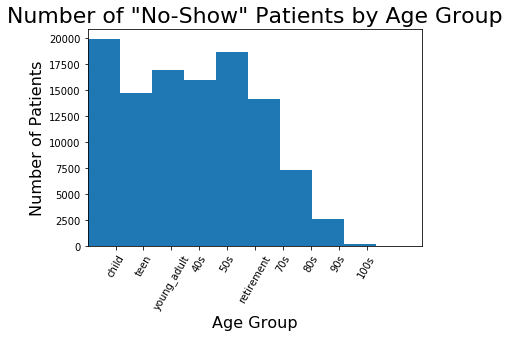

In [26]:
# Plot the histogram and set the xtick properties
ax = df['Age'].plot(kind='hist')
ax.set_xticks(cut_points)
ax.set_xticklabels(labels, rotation= 60, )

# Set histogram labels and titles
plt.xlabel('Age Group', fontsize= 16)
plt.ylabel('Number of Patients', fontsize=16)
plt.title('Number of "No-Show" Patients by Age Group', fontsize=22)
plt.xlim([0, 120])

# use the magic word to show the bar graph
plt.show()

**Answer:** By looking at the histogram graph, a great number of patients in their childhood, 50s, and retirement age group did not show up to appointments.

### Research Question 3: Does a certain gender influence whether one shows up to appointments or not? 

In [27]:
###To answer this question, we are going to create a pie chart to determine which category influences patients to 
###show up the most.

##We are going to use F column so that 1 represents female and 0 represents male.
df.groupby(['No_show','F']).size()

No_show  F
No       0    30962
         1    57245
Yes      0     7725
         1    14594
dtype: int64

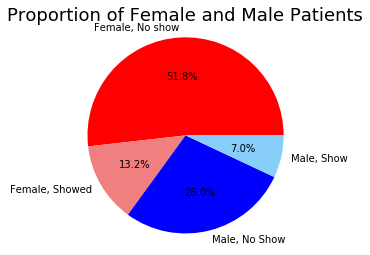

In [29]:
# Set pie chart properties
labels = 'Female, No show', 'Female, Showed', 'Male, No Show', 'Male, Show'
cut_points = [57245, 14594, 30962, 7725 ]
colors = ['red', 'lightcoral', 'blue', 'lightskyblue']

#Set piechart title and axis
fig1, ax = plt.subplots()
ax.pie(cut_points, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Proportion of Female and Male Patients', fontsize= 18)

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')

#plot piechart
plt.show()

**Answer:** By looking at the pie chart, 
* approximately 1/5 of female patients- 13.2% out of 51.8% showed up for appointments.
* while approximately 1/4 of male patients- 7.0% out of 28.0% showed up for appointments. 
* Being a male influences one to show up to appointments more.

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

### Conclusions:

* From the first question we are able to find that the Text Message does not influence patients to show up for their appointments. Because from the data their are `25,698` patients which not show up for the appointment out of `88,207`‬ that means about `29.7%` patients don't show up for appointment. 
* Whereas `9,784` patients to show up for their appointments out of `22,319`‬ that means about `43.8%` patients showed up for appointment without getting the Text Message. This conclude that Text Message does not influence the patients to show up for their appointments.
* From the second question we are able to find that, `child` (about `20.2%`) are showed up for the appointments in child age group. Similarly for `50s` age group people that is about 19.9% are showed up for the appointments and for `retirement` age group people that is about `21.02%` are showed up for the appointments.
* From last question we are able to find that female population had approximately `1/5` that showed up for their appointments while males had approximately `1/4` that showed up to appointments.

In [30]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0